In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures as pf
from matplotlib import cm
from sklearn.dummy import DummyRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [58]:
df = pd.read_csv('17_18_19_20.csv')
df.head()

df['team_name'] = LabelEncoder().fit_transform(df['team_name'])
df['venue_name'] = LabelEncoder().fit_transform(df['team_name'])

X = df.iloc[:,[1,2,3,4,5,6,7,8,9]].values
y = df.iloc[:,10].values
df.head()

,match_id,team_name,venue_name,ball_no,run,is_wide,is_noBall,Wicket,is_legBye,isBye,totalScore
0,2017_1,8,8,0.1,1,0,0,0,0,0,1
1,2017_1,8,8,0.2,0,0,0,0,0,0,1
2,2017_1,8,8,0.3,0,0,0,0,0,0,1
3,2017_1,8,8,0.4,2,0,0,0,0,0,3
4,2017_1,8,8,0.5,4,0,0,0,0,0,7


In [59]:
# getting all the features for q = 2
c_range = [ 1]
for C in c_range:
    poly_features = PolynomialFeatures(2).fit_transform(X)
    poly = PolynomialFeatures(2).fit(X)
#     lasso_model = linear_model.Lasso(alpha = 1/(2*C))
#     lasso_model.fit(poly_features, y)
    print(poly.get_feature_names_out(['team_name', 'venue_name', 'ball_no', 'run', 'is_wide', 'is_noBall', 'Wicket', 'is_legBye', 'isBye']))
    features_list = poly.get_feature_names_out(['team_name', 'venue_name', 'ball_no', 'run', 'is_wide', 'is_noBall', 'Wicket', 'is_legBye', 'isBye'])
#     print("C=", C)
#     print(lasso_model.coef_)
#     print(lasso_model.intercept_)

['1' 'team_name' 'venue_name' 'ball_no' 'run' 'is_wide' 'is_noBall'
 'Wicket' 'is_legBye' 'isBye' 'team_name^2' 'team_name venue_name'
 'team_name ball_no' 'team_name run' 'team_name is_wide'
 'team_name is_noBall' 'team_name Wicket' 'team_name is_legBye'
 'team_name isBye' 'venue_name^2' 'venue_name ball_no' 'venue_name run'
 'venue_name is_wide' 'venue_name is_noBall' 'venue_name Wicket'
 'venue_name is_legBye' 'venue_name isBye' 'ball_no^2' 'ball_no run'
 'ball_no is_wide' 'ball_no is_noBall' 'ball_no Wicket'
 'ball_no is_legBye' 'ball_no isBye' 'run^2' 'run is_wide' 'run is_noBall'
 'run Wicket' 'run is_legBye' 'run isBye' 'is_wide^2' 'is_wide is_noBall'
 'is_wide Wicket' 'is_wide is_legBye' 'is_wide isBye' 'is_noBall^2'
 'is_noBall Wicket' 'is_noBall is_legBye' 'is_noBall isBye' 'Wicket^2'
 'Wicket is_legBye' 'Wicket isBye' 'is_legBye^2' 'is_legBye isBye'
 'isBye^2']


In [105]:
# Feature selection with Lasso, result: q = 1, c = 20 selected
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

q_range = [2]
C_range = [1, 10, 20, 100]
for q in q_range:
    from sklearn.preprocessing import PolynomialFeatures    
    Xpoly_train = PolynomialFeatures(q).fit_transform(X_train)
    Xpoly_test = PolynomialFeatures(q).fit_transform(X_test)

#     Xpoly_test1 = PolynomialFeatures(q).fit(X_test)
#     print("features: ", Xpoly_test1.get_feature_names_out(["X1", "X2"]))
    
    coeff_list = []
    from sklearn.linear_model import Lasso
    for Ci in C_range:
        model = Lasso(alpha=1/(2*Ci))
        model.fit(Xpoly_train, y_train)
        ypred = model.predict(Xpoly_test)
        
#         fig=plt.figure(figsize=(10, 10))
#         ax = fig.add_subplot(111,projection='3d')
#         ax.scatter(X1, X2, y, s = 100, label="Targets")
           
#         surf = ax.plot_trisurf(X_test[:,0], X_test[:,1], model.predict(Xpoly_test), color = 'orange', alpha=.3, label="Predictions")
#         surf._edgecolors2d = surf._edgecolor3d
#         surf._facecolors2d = surf._facecolor3d

#         plt.title("Beow plot for q = %(q)i and C = %(Ci)i" % {'q': q, 'Ci': Ci})
#         ax.set_xlabel('X1')
#         ax.set_ylabel('X2')
#         ax.set_zlabel('Target')
#         ax.view_init(10,20)
#         ax.legend()
        
        print("Below plot for q = ", q, ", C = ", Ci, ", intercept: ", model.intercept_, " and coef: ", 
              model.coef_)
        coeff_list.append(model.coef_)


Below plot for q =  2 , C =  1 , intercept:  1.1121958996127006  and coef:  [ 0.00000000e+00  1.26527417e+00  8.30673039e-15  7.06104979e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -1.88681149e-01 -1.22442846e-15
 -2.70187787e-02  5.77557280e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -4.27895618e-03  5.59414738e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  6.31323782e-02
  5.57334604e-02  1.29729068e-01 -0.00000000e+00  6.93644947e-02
  0.00000000e+00  0.00000000e+00  5.78367673e-02  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
Below plot for q =  2 , C =  

/Users/abhinawtiwari/tensorflow-test/tf/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.437e+03, tolerance: 1.637e+03
  model = cd_fast.enet_coordinate_descent(


In [106]:
# coeff_list
# features_list
import csv

with open('lasso.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(features_list)
    write.writerows(coeff_list)

In [107]:
q_range = [2]
C_range = [0.01, 0.1, 1, 10, 100]
for q in q_range:
    from sklearn.preprocessing import PolynomialFeatures
    Xpoly_train = PolynomialFeatures(q).fit_transform(X_train)
    Xpoly_test = PolynomialFeatures(q).fit_transform(X_test)

    ridge_coeff_list = []
    from sklearn.linear_model import Ridge
    for Ci in C_range:
        model = Ridge(alpha=1/(2*Ci))
        model.fit(Xpoly_train, y_train)
        ypred = model.predict(Xpoly_test)
                
        print("For q = ", q, ", C = ", Ci, ", intercept: ", model.intercept_, " and coef: ", 
              model.coef_)
        ridge_coeff_list.append(model.coef_)


For q =  2 , C =  0.01 , intercept:  -3.433491879867489  and coef:  [ 0.00000000e+00  1.32653510e+00  1.32653510e+00  7.36076168e+00
  1.20463381e+00  8.34852375e-01 -9.99234327e-02 -3.36782376e-01
  1.12165979e-01 -5.19550479e-01 -9.68254973e-02 -9.68254973e-02
 -2.83032442e-02 -9.82591623e-04 -2.74822790e-01  5.43599053e-01
 -6.36335161e-02 -1.44184138e-01  2.91774911e-01 -9.68254973e-02
 -2.83032442e-02 -9.82591623e-04 -2.74822790e-01  5.43599053e-01
 -6.36335161e-02 -1.44184138e-01  2.91774911e-01  5.40370888e-02
  3.93216000e-02  2.71569164e-01 -2.73962592e-01  2.58814355e-01
  6.35571993e-02  6.87596579e-01 -5.87631901e-02  5.17967221e-02
 -4.91422739e-01 -1.28676669e+00 -9.95852477e-02 -1.38239749e+00
  8.34852375e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -9.99234327e-02  0.00000000e+00  0.00000000e+00
  2.60046634e-01 -3.36782376e-01  0.00000000e+00  0.00000000e+00
  1.12165979e-01 -5.62565185e-01 -5.19550479e-01]
For q =  2 , C =  0.1 , intercept:  -

In [108]:
# coeff_list
# features_list
import csv

with open('ridge.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(features_list)
    write.writerows(ridge_coeff_list)

KFold follows

[0.8992473608566833, 0.8992860465772614, 0.8992613488302658, 0.8992937500151585, 0.8992894123494974]


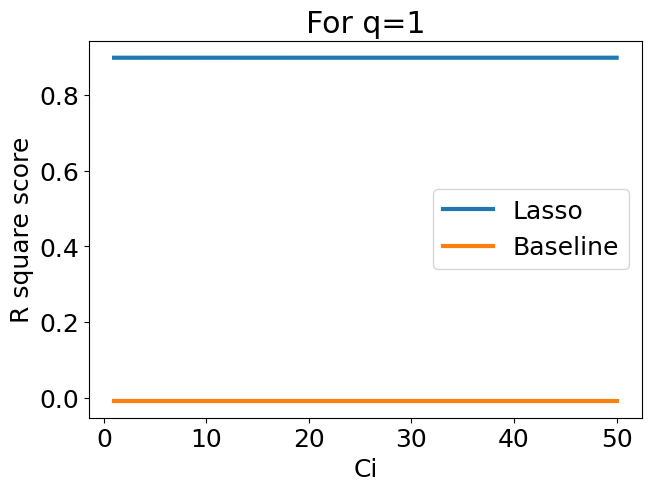

[0.8971542266824754, 0.8962325551872474, 0.8961902026194372, 0.8961443977846555, 0.8960720536530882]


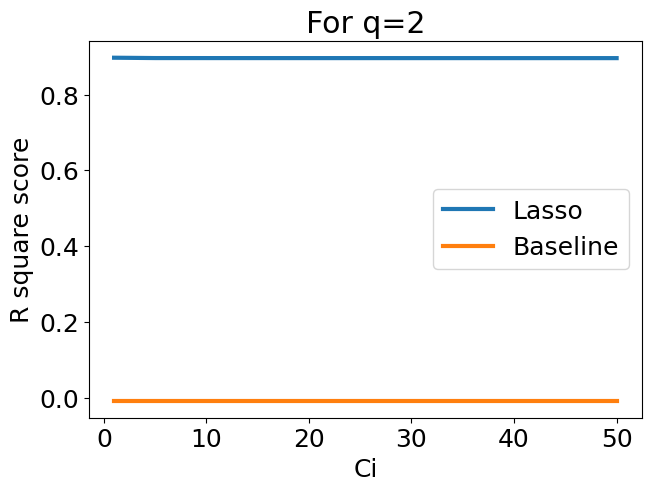

In [95]:
# Lasso with r square
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

plt.rc('font', size=18); 
plt.rcParams['figure.constrained_layout.use'] = True

q_range = [1,2]
C_range = [1,5,10, 20, 50]

for q in q_range:
    from sklearn.preprocessing import PolynomialFeatures
    Xpoly = PolynomialFeatures(q).fit_transform(X)
    from sklearn.linear_model import Lasso
    mean_error=[]; std_error=[]
    mean_error_bs=[]; std_error_bs=[]
    for Ci in C_range:
        model = Lasso(alpha=1/(2*Ci))
        temp=[]; temp_bs=[]; plotted = False
        for train, test in kf.split(Xpoly):
            model.fit(Xpoly[train], y[train])
            ypred = model.predict(Xpoly[test])
            
            lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(Xpoly[train], y[train])
            y_predict_dummy_mean = lm_dummy_mean.predict(Xpoly[test])
            
            from sklearn.metrics import r2_score
            temp.append(r2_score(y[test],ypred))
            temp_bs.append(r2_score(y[test],y_predict_dummy_mean))
        mean_error.append(np.array(temp).mean())
        mean_error_bs.append(np.array(temp_bs).mean())
    print(mean_error)
    plt.errorbar(C_range,mean_error,linewidth=3, label="Lasso")
    plt.errorbar(C_range,mean_error_bs,linewidth=3, label="Baseline")
    plt.xlabel('Ci')
    plt.ylabel('R square score')
    plt.title(label="For q = ")
    plt.title('For q=%i' %q)
    plt.legend()
    plt.show()

[45.23381478251239, 41.4319714885826, 40.63224487347904, 39.935753051884284, 39.68350165044529, 39.48116831705578, 39.40099356719772]
[244.1237732474191, 237.88942792596913, 237.5715050142266, 237.49435478727437, 237.55430338951584, 237.4760894636648, 237.48374660219915]


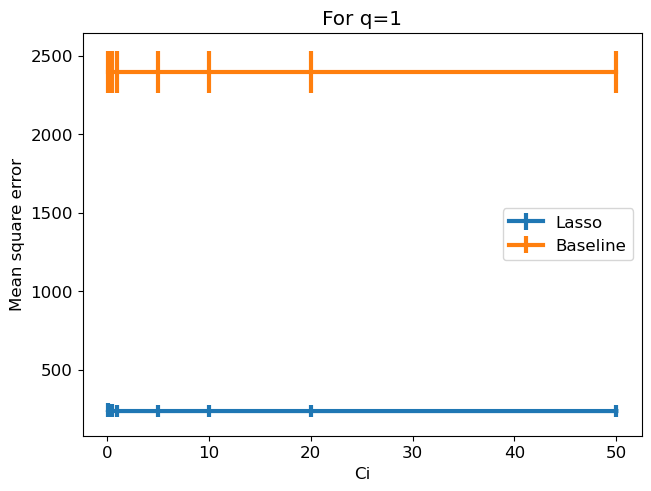

[43.67038962101854, 36.47465210886068, 34.41233621493229, 32.74001546362496, 32.47699321172898, 32.347676689248, 32.26038383668484]
[250.0474008297953, 240.0429924978405, 242.6169691920254, 244.8650135379508, 244.97193783405882, 245.08383171146698, 245.2575107770114]


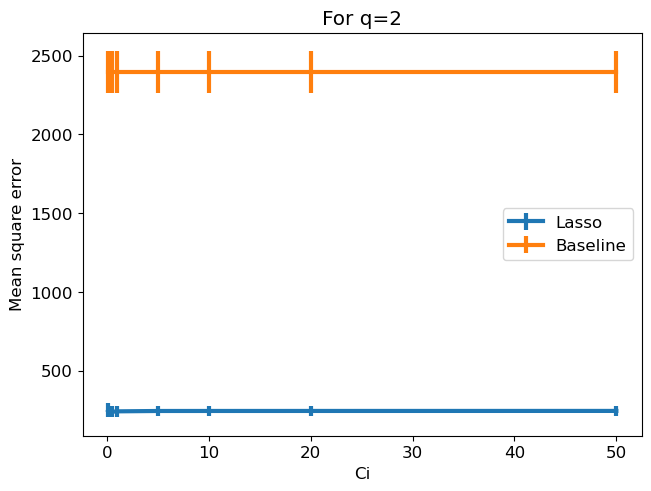

In [94]:
# Lasso with mean square error
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

plt.rc('font', size=12); 
plt.rcParams['figure.constrained_layout.use'] = True

q_range = [1,2]
C_range = [0.1,0.5, 1,5,10, 20, 50]

for q in q_range:
    from sklearn.preprocessing import PolynomialFeatures
    Xpoly = PolynomialFeatures(q).fit_transform(X)
    from sklearn.linear_model import Lasso
    mean_error=[]; std_error=[]
    mean_error_bs=[]; std_error_bs=[]
    for Ci in C_range:
        model = Lasso(alpha=1/(2*Ci))
        temp=[]; temp_bs=[]; plotted = False
        for train, test in kf.split(Xpoly):
            model.fit(Xpoly[train], y[train])
            ypred = model.predict(Xpoly[test])
            
            lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(Xpoly[train], y[train])
            y_predict_dummy_mean = lm_dummy_mean.predict(Xpoly[test])
            
            from sklearn.metrics import mean_squared_error
            temp.append(mean_squared_error(y[test],ypred))
            temp_bs.append(mean_squared_error(y[test],y_predict_dummy_mean))
        mean_error.append(np.array(temp).mean())
        std_error.append(np.array(temp).std())
        mean_error_bs.append(np.array(temp_bs).mean())
        std_error_bs.append(np.array(temp_bs).std())
    print(std_error)
    print(mean_error)
    plt.errorbar(C_range,mean_error,yerr=std_error,linewidth=3, label="Lasso")
    plt.errorbar(C_range,mean_error_bs,yerr=std_error_bs,linewidth=3, label="Baseline")
    plt.xlabel('Ci')
    plt.ylabel('Mean square error')
    plt.title(label="For q = ")
    plt.title('For q=%i' %q)
    plt.legend()
    plt.show()

standard deviation:  [1.496786325004195, 1.390300783514444, 1.364067821659945, 1.340694329884765, 1.3323310889794941, 1.326089954559182, 1.3236323806156145]
rmse:  [15.552601195449574, 15.360875354527431, 15.35287673343789, 15.352423049834485, 15.355103296912546, 15.353096589811518, 15.35355802161782]


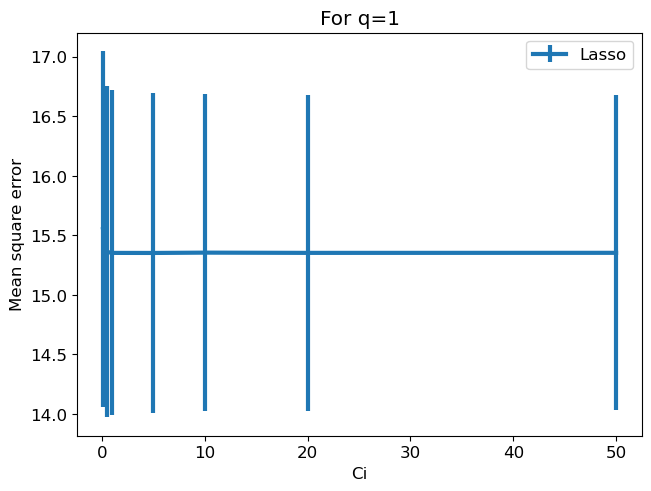

standard deviation:  [1.40310645857185, 1.2116164274757297, 1.139377282231113, 1.0783859222035357, 1.068824571534783, 1.064078909259459, 1.0608338297496094]
rmse:  [15.75051405814138, 15.445872527329476, 15.534438792591157, 15.610960807738389, 15.615042486952836, 15.618948997494556, 15.624728553247579]


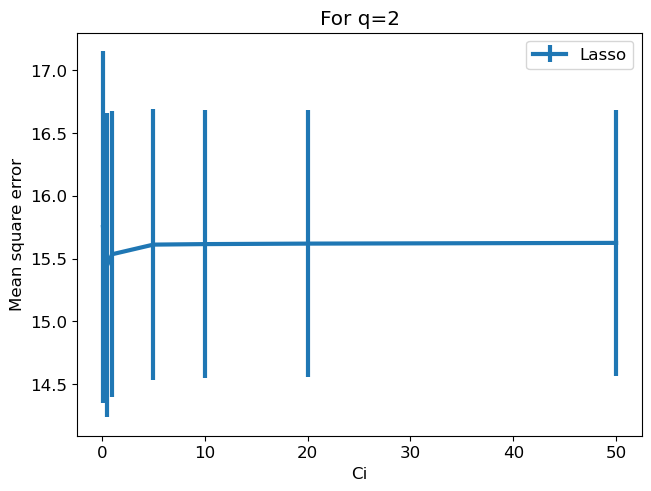

In [111]:
# Lasso with root mean square error
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

plt.rc('font', size=12); 
plt.rcParams['figure.constrained_layout.use'] = True

q_range = [1,2]
C_range = [0.1,0.5, 1,5,10, 20, 50]

for q in q_range:
    from sklearn.preprocessing import PolynomialFeatures
    Xpoly = PolynomialFeatures(q).fit_transform(X)
    from sklearn.linear_model import Lasso
    mean_error=[]; std_error=[]
    mean_error_bs=[]; std_error_bs=[]
    for Ci in C_range:
        model = Lasso(alpha=1/(2*Ci))
        temp=[]; temp_bs=[]; plotted = False
        for train, test in kf.split(Xpoly):
            model.fit(Xpoly[train], y[train])
            ypred = model.predict(Xpoly[test])
            
            lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(Xpoly[train], y[train])
            y_predict_dummy_mean = lm_dummy_mean.predict(Xpoly[test])
            
            from sklearn.metrics import mean_squared_error
            temp.append(np.sqrt(mean_squared_error(y[test],ypred)))
            temp_bs.append(np.sqrt(mean_squared_error(y[test],y_predict_dummy_mean)))
        mean_error.append(np.array(temp).mean())
        std_error.append(np.array(temp).std())
        mean_error_bs.append(np.array(temp_bs).mean())
        std_error_bs.append(np.array(temp_bs).std())
    print("standard deviation: ", std_error)
    print("rmse: ", mean_error)
    plt.errorbar(C_range,mean_error,yerr=std_error,linewidth=3, label="Lasso")
#     plt.errorbar(C_range,mean_error_bs,yerr=std_error_bs,linewidth=3, label="Baseline")
    plt.xlabel('Ci')
    plt.ylabel('Mean square error')
    plt.title(label="For q = ")
    plt.title('For q=%i' %q)
    plt.legend()
    plt.show()

[11.981621402493369, 11.874129595232064, 11.879510226000171, 11.889955082007639, 11.893687081667762, 11.89344759000364, 11.89450349282535]


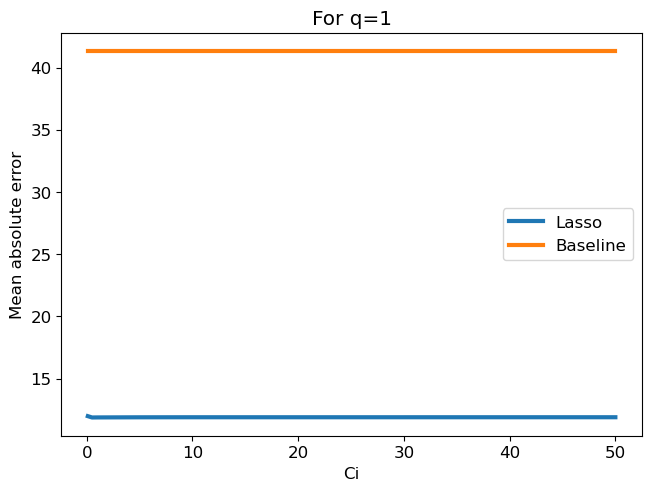

[12.341967563862084, 11.900080558098733, 11.97955969839615, 12.061089793738134, 12.06524849695423, 12.069035671662071, 12.075075850738765]


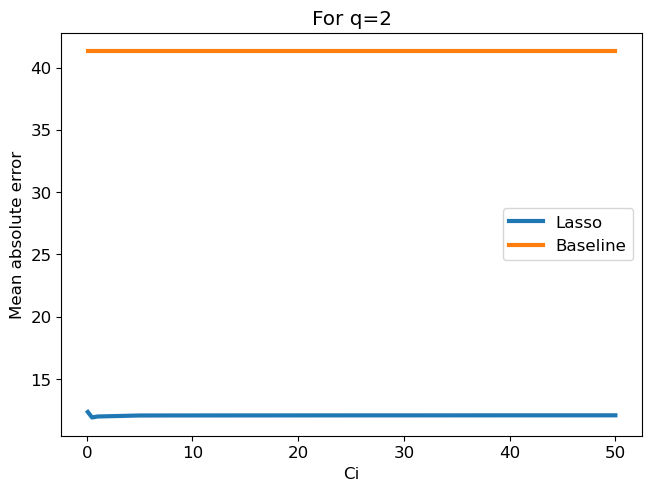

In [93]:
# Lasso with mean_absolute_error
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

plt.rc('font', size=12); 
plt.rcParams['figure.constrained_layout.use'] = True

q_range = [1,2]
C_range = [0.1, 0.5, 1,5,10, 20, 50]

for q in q_range:
    from sklearn.preprocessing import PolynomialFeatures
    Xpoly = PolynomialFeatures(q).fit_transform(X)
    from sklearn.linear_model import Lasso
    mean_error=[]; std_error=[]
    mean_error_bs=[]; std_error_bs=[]
    for Ci in C_range:
        model = Lasso(alpha=1/(2*Ci))
        temp=[]; temp_bs=[]; plotted = False
        for train, test in kf.split(Xpoly):
            model.fit(Xpoly[train], y[train])
            ypred = model.predict(Xpoly[test])
            
            lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(Xpoly[train], y[train])
            y_predict_dummy_mean = lm_dummy_mean.predict(Xpoly[test])
            
            from sklearn.metrics import mean_absolute_error
            temp.append(mean_absolute_error(y[test],ypred))
            temp_bs.append(mean_absolute_error(y[test],y_predict_dummy_mean))
        mean_error.append(np.array(temp).mean())
#         std_error.append(np.array(temp).std())
        mean_error_bs.append(np.array(temp_bs).mean())
#         std_error_bs.append(np.array(temp_bs).std())
#     print(std_error)
    print(mean_error)
    plt.errorbar(C_range,mean_error,linewidth=3, label="Lasso")
    plt.errorbar(C_range,mean_error_bs,linewidth=3, label="Baseline")
    plt.xlabel('Ci')
    plt.ylabel('Mean absolute error')
    plt.title(label="For q = ")
    plt.title('For q=%i' %q)
    plt.legend()
    plt.show()

In [76]:
test_df = pd.read_csv('2022.csv')
test_df['team_name'] = LabelEncoder().fit_transform(test_df['team_name'])
test_df['venue_name'] = LabelEncoder().fit_transform(test_df['team_name'])

X_test_final = test_df.iloc[:,[1,2,3,4,5,6,7,8,9]].values
y_test_final = test_df.iloc[:,10].values

,match_id,team_name,venue_name,ball_no,run,is_wide,is_noBall,Wicket,is_legBye,isBye,totalScore
0,2022_1,3,3,0.1,0,0,0,0,0,0,0
1,2022_1,3,3,0.2,0,0,0,0,0,0,0
2,2022_1,3,3,0.3,0,0,0,0,0,0,0
3,2022_1,3,3,0.4,2,0,0,0,0,0,2
4,2022_1,3,3,0.5,4,0,0,0,0,0,6


[11.89344759000364]


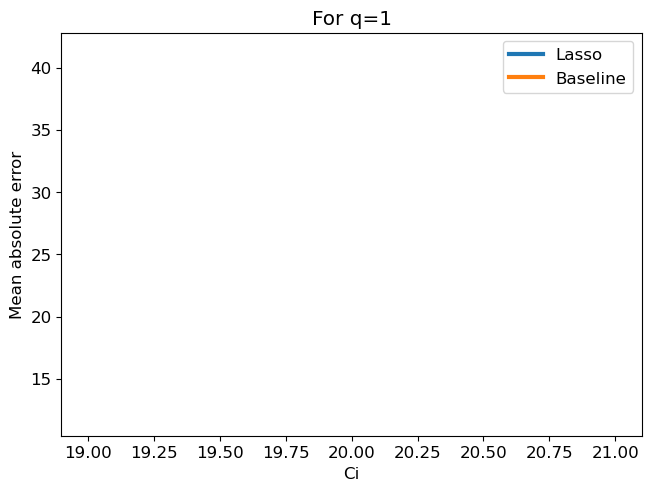

lasso prediction mean absolute error:  11.757545222892258
mean baseline predictor mean absolute error:  41.2485720698042

lasso prediction mean squared error:  231.16868347801085
mean baseline predictor mean squared error:  2390.87728809212

lasso prediction root mean squared error:  15.204232419889234
mean baseline predictor root mean squared error:  48.896597919406624

lasso prediction r2:  0.9032953769884267
mean baseline predictor r2:  -0.00017391340931460775


In [98]:
# Model prediction Lasso
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

plt.rc('font', size=12); 
plt.rcParams['figure.constrained_layout.use'] = True

q_range = [1]
C_range = [20]

for q in q_range:
    from sklearn.preprocessing import PolynomialFeatures
    Xpoly = PolynomialFeatures(q).fit_transform(X)
    from sklearn.linear_model import Lasso
    mean_error=[]; std_error=[]
    mean_error_bs=[]; std_error_bs=[]
    for Ci in C_range:
        model = Lasso(alpha=1/(2*Ci))
        temp=[]; temp_bs=[]; plotted = False
        for train, test in kf.split(Xpoly):
            model.fit(Xpoly[train], y[train])
            ypred = model.predict(Xpoly[test])
            
            lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(Xpoly[train], y[train])
            y_predict_dummy_mean = lm_dummy_mean.predict(Xpoly[test])
            
            from sklearn.metrics import mean_absolute_error
            temp.append(mean_absolute_error(y[test],ypred))
            temp_bs.append(mean_absolute_error(y[test],y_predict_dummy_mean))
        mean_error.append(np.array(temp).mean())
#         std_error.append(np.array(temp).std())
        mean_error_bs.append(np.array(temp_bs).mean())
#         std_error_bs.append(np.array(temp_bs).std())
#     print(std_error)
    print(mean_error)
    plt.errorbar(C_range,mean_error,linewidth=3, label="Lasso")
    plt.errorbar(C_range,mean_error_bs,linewidth=3, label="Baseline")
    plt.xlabel('Ci')
    plt.ylabel('Mean absolute error')
    plt.title(label="For q = ")
    plt.title('For q=%i' %q)
    plt.legend()
    plt.show()

    
Xpoly_test_final = PolynomialFeatures(1).fit_transform(X_test_final)
y_pred_final = model.predict(Xpoly_test_final)
y_pred_dummy_final = lm_dummy_mean.predict(Xpoly_test_final)
print('lasso prediction mean absolute error: ', mean_absolute_error(y_test_final,y_pred_final))
print('mean baseline predictor mean absolute error: ', mean_absolute_error(y_test_final,y_pred_dummy_final))

print('\nlasso prediction mean squared error: ', mean_squared_error(y_test_final,y_pred_final))
print('mean baseline predictor mean squared error: ', mean_squared_error(y_test_final,y_pred_dummy_final))

print('\nlasso prediction root mean squared error: ', np.sqrt(mean_squared_error(y_test_final,y_pred_final)))
print('mean baseline predictor root mean squared error: ', np.sqrt(mean_squared_error(y_test_final,y_pred_dummy_final)))

print('\nlasso prediction r2: ', r2_score(y_test_final,y_pred_final))
print('mean baseline predictor r2: ', r2_score(y_test_final,y_pred_dummy_final))

[0.8992565179033758, 0.8992458564237324, 0.8992443059843028, 0.8992430223119182, 0.8992428590148462, 0.899242777124081, 0.8992427279117516]


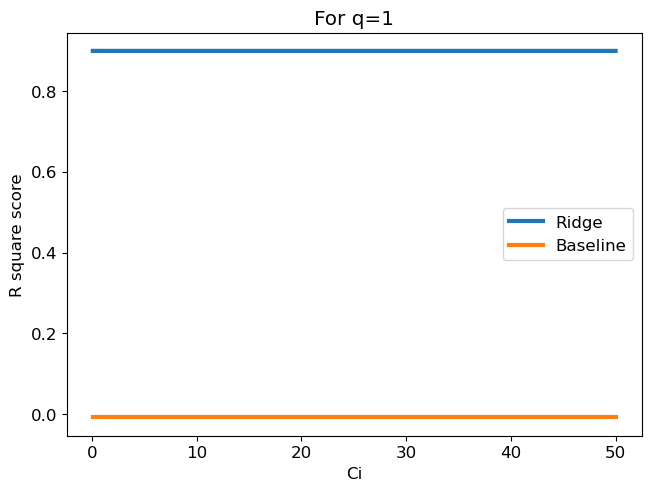

[0.8958879729108038, 0.8957944455987945, 0.8957686875091475, 0.8957374472235891, 0.8957321916051096, 0.8957293860929327, 0.8957276393179854]


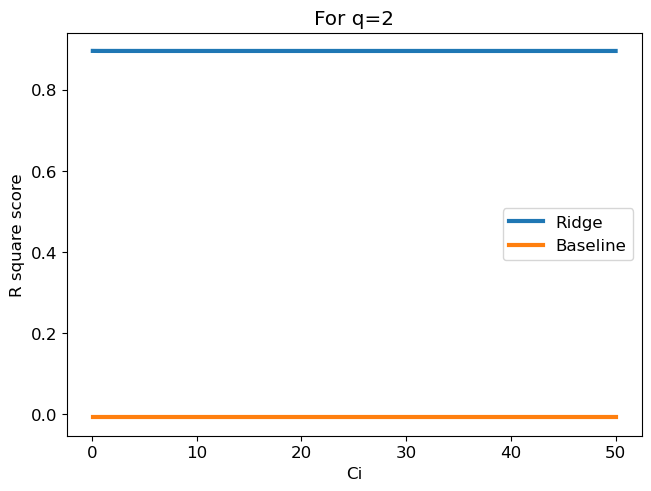

In [99]:
# r square ridge
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

plt.rc('font', size=12); 
plt.rcParams['figure.constrained_layout.use'] = True

q_range = [1,2]
C_range = [0.1, 0.5, 1,5,10, 20, 50]

for q in q_range:
    from sklearn.preprocessing import PolynomialFeatures
    Xpoly = PolynomialFeatures(q).fit_transform(X)
    from sklearn.linear_model import Ridge
    mean_error=[]; std_error=[]
    mean_error_bs=[]; std_error_bs=[]
    for Ci in C_range:
        model = Ridge(alpha=1/(2*Ci))
        temp=[]; temp_bs=[]; plotted = False
        for train, test in kf.split(Xpoly):
            model.fit(Xpoly[train], y[train])
            ypred = model.predict(Xpoly[test])
            
            lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(Xpoly[train], y[train])
            y_predict_dummy_mean = lm_dummy_mean.predict(Xpoly[test])
            
            from sklearn.metrics import r2_score
            temp.append(r2_score(y[test],ypred))
            temp_bs.append(r2_score(y[test],y_predict_dummy_mean))
        mean_error.append(np.array(temp).mean())
#         std_error.append(np.array(temp).std())
        mean_error_bs.append(np.array(temp_bs).mean())
#         std_error_bs.append(np.array(temp_bs).std())
    print(mean_error)
    plt.errorbar(C_range,mean_error,linewidth=3, label="Ridge")
    plt.errorbar(C_range,mean_error_bs,linewidth=3, label="Baseline")
    plt.xlabel('Ci')
    plt.ylabel('R square score')
    plt.title(label="For q = ")
    plt.title('For q=%i' %q)
    plt.legend()
    plt.show()

[39.39078315521332, 39.358361582729735, 39.35500426432305, 39.35458579351892, 39.354251941816, 39.35421028145169, 39.354189457799684, 39.35417696573653]
[237.44186673626655, 237.5610345404747, 237.58605223568279, 237.58969799014713, 237.5927178087921, 237.5931020486124, 237.59329474573966, 237.59341054957707]


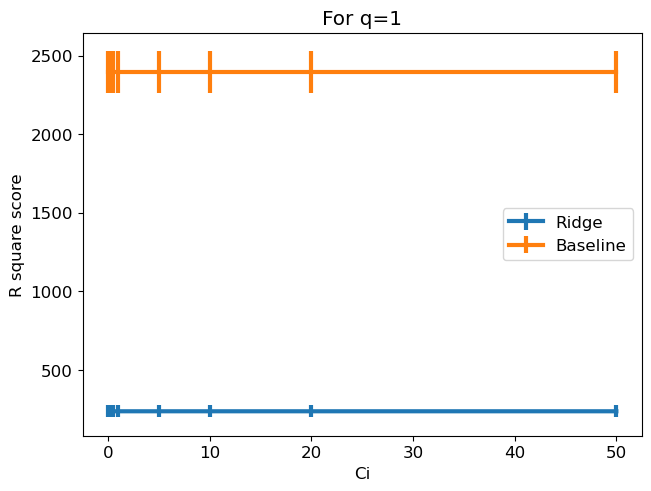

[32.28262888996643, 32.22946482169328, 32.18409027006233, 32.15805482003864, 32.10984856673689, 32.099671740371114, 32.09399178069925, 32.09036903279195]
[245.24992593423173, 245.68806804825084, 245.9093387098216, 245.97118179170735, 246.04713977622663, 246.06003031501186, 246.06692452442167, 246.0712215581919]


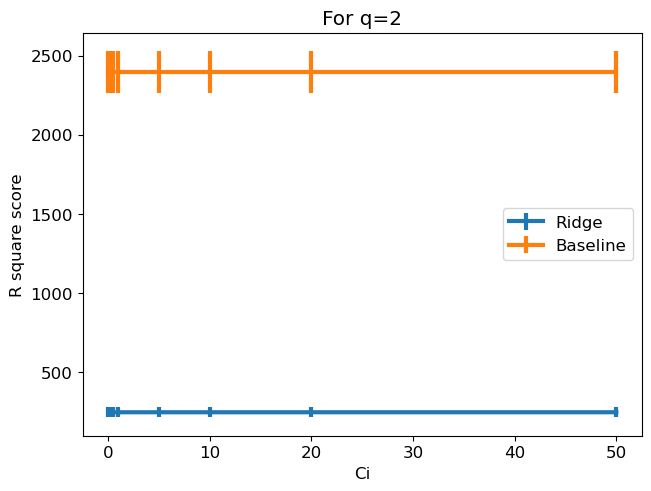

In [101]:
# Ridge with mean square error
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

plt.rc('font', size=12); 
plt.rcParams['figure.constrained_layout.use'] = True

q_range = [1,2]
C_range = [0.01,0.1, 0.5, 1,5,10, 20, 50]

for q in q_range:
    from sklearn.preprocessing import PolynomialFeatures
    Xpoly = PolynomialFeatures(q).fit_transform(X)
    from sklearn.linear_model import Ridge
    mean_error=[]; std_error=[]
    mean_error_bs=[]; std_error_bs=[]
    for Ci in C_range:
        model = Ridge(alpha=1/(2*Ci))
        temp=[]; temp_bs=[]; plotted = False
        for train, test in kf.split(Xpoly):
            model.fit(Xpoly[train], y[train])
            ypred = model.predict(Xpoly[test])
            
            lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(Xpoly[train], y[train])
            y_predict_dummy_mean = lm_dummy_mean.predict(Xpoly[test])
            
            from sklearn.metrics import mean_squared_error
            temp.append(mean_squared_error(y[test],ypred))
            temp_bs.append(mean_squared_error(y[test],y_predict_dummy_mean))
        mean_error.append(np.array(temp).mean())
        std_error.append(np.array(temp).std())
        mean_error_bs.append(np.array(temp_bs).mean())
        std_error_bs.append(np.array(temp_bs).std())
    print(std_error)
    print(mean_error)
    plt.errorbar(C_range,mean_error,yerr=std_error,linewidth=3, label="Ridge")
    plt.errorbar(C_range,mean_error_bs,yerr=std_error_bs,linewidth=3, label="Baseline")
    plt.xlabel('Ci')
    plt.ylabel('R square score')
    plt.title(label="For q = ")
    plt.title('For q=%i' %q)
    plt.legend()
    plt.show()

[11.897762804402845, 11.897847400205233, 11.897858118570511, 11.897863490013744, 11.897866716819841]


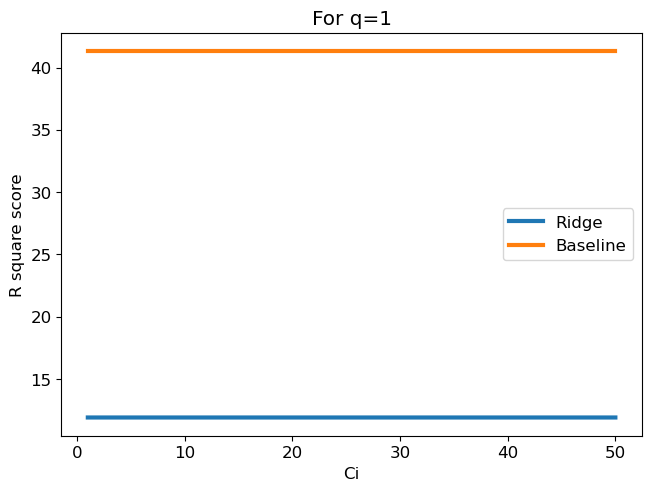

[12.093652471340985, 12.095587526465353, 12.095919030923499, 12.096093908579684, 12.096202023082645]


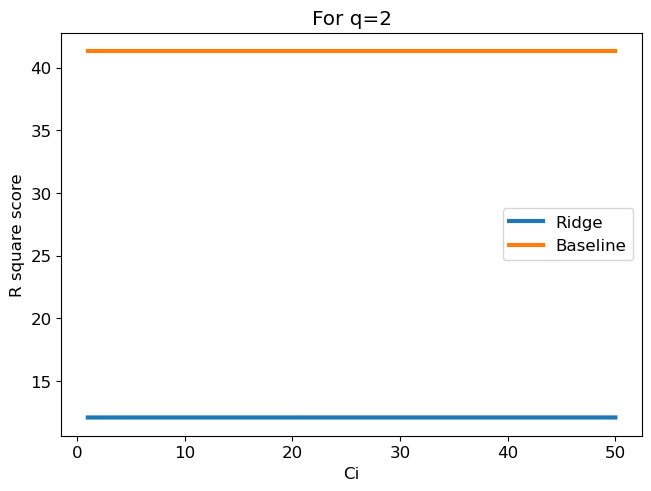

In [90]:
# Ridge with mean_absolute_error
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

plt.rc('font', size=12); 
plt.rcParams['figure.constrained_layout.use'] = True

q_range = [1,2]
C_range = [1,5,10, 20, 50]

for q in q_range:
    from sklearn.preprocessing import PolynomialFeatures
    Xpoly = PolynomialFeatures(q).fit_transform(X)
    from sklearn.linear_model import Ridge
    mean_error=[]; std_error=[]
    mean_error_bs=[]; std_error_bs=[]
    for Ci in C_range:
        model = Ridge(alpha=1/(2*Ci))
        temp=[]; temp_bs=[]; plotted = False
        for train, test in kf.split(Xpoly):
            model.fit(Xpoly[train], y[train])
            ypred = model.predict(Xpoly[test])
            
            lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(Xpoly[train], y[train])
            y_predict_dummy_mean = lm_dummy_mean.predict(Xpoly[test])
            
            from sklearn.metrics import mean_absolute_error
            temp.append(mean_absolute_error(y[test],ypred))
            temp_bs.append(mean_absolute_error(y[test],y_predict_dummy_mean))
        mean_error.append(np.array(temp).mean())
#         std_error.append(np.array(temp).std())
        mean_error_bs.append(np.array(temp_bs).mean())
#         std_error_bs.append(np.array(temp_bs).std())
#     print(std_error)
    print(mean_error)
    plt.errorbar(C_range,mean_error,linewidth=3, label="Ridge")
    plt.errorbar(C_range,mean_error_bs,linewidth=3, label="Baseline")
    plt.xlabel('Ci')
    plt.ylabel('R square score')
    plt.title(label="For q = ")
    plt.title('For q=%i' %q)
    plt.legend()
    plt.show()

[11.897762804402845]


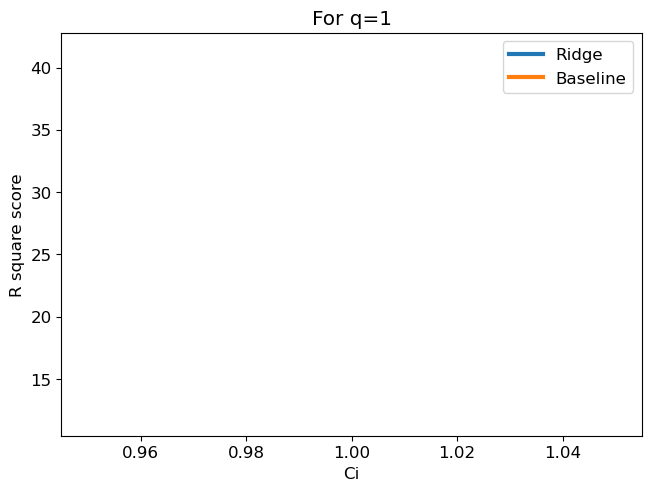

ridge prediction mean absolute error:  11.759737838657557
mean baseline predictor mean absolute error:  41.2485720698042

ridge prediction mean squared error:  231.14070105399574
mean baseline predictor mean squared error:  2390.87728809212

ridge prediction root mean squared error:  15.203312173799358
mean baseline predictor root mean squared error:  48.896597919406624

ridge prediction r2:  0.9033070828550026
mean baseline predictor r2:  -0.00017391340931460775


In [104]:
# Prediction with Ridge
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

plt.rc('font', size=12); 
plt.rcParams['figure.constrained_layout.use'] = True

q_range = [1]
C_range = [1]

for q in q_range:
    from sklearn.preprocessing import PolynomialFeatures
    Xpoly = PolynomialFeatures(q).fit_transform(X)
    from sklearn.linear_model import Ridge
    mean_error=[]; std_error=[]
    mean_error_bs=[]; std_error_bs=[]
    for Ci in C_range:
        model = Ridge(alpha=1/(2*Ci))
        temp=[]; temp_bs=[]; plotted = False
        for train, test in kf.split(Xpoly):
            model.fit(Xpoly[train], y[train])
            ypred = model.predict(Xpoly[test])
            
            lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(Xpoly[train], y[train])
            y_predict_dummy_mean = lm_dummy_mean.predict(Xpoly[test])
            
            from sklearn.metrics import mean_absolute_error
            temp.append(mean_absolute_error(y[test],ypred))
            temp_bs.append(mean_absolute_error(y[test],y_predict_dummy_mean))
        mean_error.append(np.array(temp).mean())
#         std_error.append(np.array(temp).std())
        mean_error_bs.append(np.array(temp_bs).mean())
#         std_error_bs.append(np.array(temp_bs).std())
#     print(std_error)
    print(mean_error)
    plt.errorbar(C_range,mean_error,linewidth=3, label="Ridge")
    plt.errorbar(C_range,mean_error_bs,linewidth=3, label="Baseline")
    plt.xlabel('Ci')
    plt.ylabel('R square score')
    plt.title(label="For q = ")
    plt.title('For q=%i' %q)
    plt.legend()
    plt.show()
    
Xpoly_test_final = PolynomialFeatures(1).fit_transform(X_test_final)
y_pred_final = model.predict(Xpoly_test_final)
y_pred_dummy_final = lm_dummy_mean.predict(Xpoly_test_final)
print('ridge prediction mean absolute error: ', mean_absolute_error(y_test_final,y_pred_final))
print('mean baseline predictor mean absolute error: ', mean_absolute_error(y_test_final,y_pred_dummy_final))

print('\nridge prediction mean squared error: ', mean_squared_error(y_test_final,y_pred_final))
print('mean baseline predictor mean squared error: ', mean_squared_error(y_test_final,y_pred_dummy_final))

print('\nridge prediction root mean squared error: ', np.sqrt(mean_squared_error(y_test_final,y_pred_final)))
print('mean baseline predictor root mean squared error: ', np.sqrt(mean_squared_error(y_test_final,y_pred_dummy_final)))

print('\nridge prediction r2: ', r2_score(y_test_final,y_pred_final))
print('mean baseline predictor r2: ', r2_score(y_test_final,y_pred_dummy_final))